### Phase 1: Data Exploration & Initial Assessment

#### Load The DataSet

In [189]:
import pandas as pd
x=pd.read_csv('India Agriculture Crop Production.csv')

#### View the Sample Data

In [190]:
x.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


##### *This dataset records agricultural statistics for different crops across various Indian states and districts, detailing crop area, production, and yield per season and year. It helps analyze crop performance, trends, and regional productivity for planning and research purposes.*

#### Basic Dataset Information

In [191]:
print("Dataset Shape:\n")
print(f"Rows: {x.shape[0]}, Columns: {x.shape[1]}")
print("\n" + "="*50)
print("\nColumn Names and Data Types:\n")
print(x.dtypes)
print("\n" + "="*50)
print("\nDataset Info:\n")
x.info()

Dataset Shape:

Rows: 345407, Columns: 10


Column Names and Data Types:

State                object
District             object
Crop                 object
Year                 object
Season               object
Area                float64
Area Units           object
Production          float64
Production Units     object
Yield               float64
dtype: object


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  3

#### What kind of data does each column contain?
1. `State:` Name of the Indian state where the data was recorded.
   
2. `District:` Name of the district within the state for more precise location.

3. `Crop:` Type or name of the crop being analyzed.

4. `Year:` Calendar or agricultural year for which the data is reported.

5. `Season:` The cropping season (e.g., Kharif, Rabi) in which the crop was grown.

6. `Area:` The total land area used for cultivating the crop.

7. `Area Units:` Units for the area measurement (typically in hectares or acres).

8. `Production:` Total quantity of crop harvested/produced.

9. `Production Units:` Units for production measurement (typically in tonnes or kilograms).

10. `Yield:` Crop yield per unit area (often measured as kilograms per hectare).

#### Missing Values Analysis

In [192]:
print("Missing Values Count:")
print(x.isnull().sum())
print("\n" + "="*50)
print("\nMissing Values Percentage:")
missing_pct = (x.isnull().sum() / len(x)) * 100
print(missing_pct.round(2))
print("\n" + "="*50)
print("\nDuplicate Rows:")
print(f"Number of duplicate rows: {x.duplicated().sum()}")

Missing Values Count:
State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64


Missing Values Percentage:
State               0.00
District            0.00
Crop                0.01
Year                0.00
Season              0.00
Area                0.01
Area Units          0.00
Production          1.45
Production Units    0.00
Yield               0.01
dtype: float64


Duplicate Rows:
Number of duplicate rows: 0


#### Categorical Variables Analysis

In [193]:
print("Unique Values in Categorical Columns:")
print(f"Number of States: {x['State'].nunique()}")
print(f"Number of Districts: {x['District'].nunique()}")
print(f"Number of Crops: {x['Crop'].nunique()}")
print(f"Number of Years: {x['Year'].nunique()}")
print(f"Number of Seasons: {x['Season'].nunique()}")
print(f"Number of Area Units: {x['Area Units'].nunique()}")
print(f"Number of Production Units: {x['Production Units'].nunique()}")

Unique Values in Categorical Columns:
Number of States: 36
Number of Districts: 729
Number of Crops: 56
Number of Years: 24
Number of Seasons: 6
Number of Area Units: 1
Number of Production Units: 3


#### Statistical Summary for Numerical Columns

In [194]:
print("Statistical Summary of Numerical Features:\n")
print(x.describe().round())

Statistical Summary of Numerical Features:

            Area    Production     Yield
count   345374.0  3.404140e+05  345374.0
mean     11670.0  9.583710e+05      79.0
std      45838.0  2.152986e+07     917.0
min          0.0  0.000000e+00       0.0
25%         74.0  8.700000e+01       1.0
50%        532.0  7.170000e+02       1.0
75%       4110.0  7.176000e+03       2.0
max    8580100.0  1.597800e+09   43958.0


#### Data Quality Issues
1. The "Number of Area Units" column contains only one categorical value and does not contribute any meaningful information for analysis. Therefore, it can be removed.
2. In the "States" column, there are a few inconsistencies, such as spelling errors. For example, "Laddakh" should be corrected to "Ladakh."
3. In the "Districts" column, some entries for Andaman and Nicobar Islands contain state names instead of district names, resulting in mixed values.
4. In the "Crops" section:
   1. There is a need to standardize the case (capitalization) for all crop names.
   2. Entries in general categories such as "Other ..." should be converted to a single standardized value, such as "Other," to maintain consistency and simplify analysis.
   3. Missing values should be handled appropriately.
5. In the "Seasons" column, there are inconsistent season names. For instance, "rabi" is an alternative name for "winter," and "kharif" should refer to "monsoon." These inconsistencies need to be resolved and standardized.

### Phase 2: Data Cleaning & Manipulation

#### Task 1: Handle Missing Data

In [195]:
# Identify missing values
print("Missing Values Count:")
print(x.isnull().sum())
print("\nPercentage of Missing Values:")
print((x.isnull().sum() / len(x)) * 100)

Missing Values Count:
State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

Percentage of Missing Values:
State               0.000000
District            0.000000
Crop                0.009264
Year                0.000000
Season              0.000290
Area                0.009554
Area Units          0.000000
Production          1.445541
Production Units    0.000000
Yield               0.009554
dtype: float64


In [196]:
# Handle missing values

# For 'Crop' column - fill with mode
x['Crop']=x['Crop'].fillna(x['Crop'].mode()[0])
print("Filled 'Crop' missing values with mode")

# For 'Area' column - fill with median
x['Area']=x['Area'].fillna(x['Area'].median())
print("Filled 'Area' missing values with median")

# For 'Production' column - fill with median
x['Production']=x['Production'].fillna(x['Production'].median())
print("Filled 'Production' missing values with median")

# For 'Yield' column - fill with median
x['Yield']=x['Yield'].fillna(x['Yield'].median())
print("Filled 'Yield' missing values with median")

# Verify
print("\nMissing values after handling:")
print(x.isnull().sum())

Filled 'Crop' missing values with mode
Filled 'Area' missing values with median
Filled 'Production' missing values with median
Filled 'Yield' missing values with median

Missing values after handling:
State               0
District            0
Crop                0
Year                0
Season              1
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64


#### Task 2: Remove Duplicates

In [197]:
# Check for duplicate records
print("Number of duplicate rows:", x.duplicated().sum())
print("\nTotal records before:", len(x))

# Remove duplicates
if x.duplicated().sum() > 0:
    x.drop_duplicates(inplace=True)
    print("\nDuplicates removed!")
    print("Total records after:", len(x))
else:
    print("\nNo duplicates found.")

Number of duplicate rows: 0

Total records before: 345407

No duplicates found.


#### Task 3: Fix Inconsistencies in Categorical Data

In [198]:
for col in ['State', 'District', 'Crop', 'Area Units']:
    print(f"\n{col} - Unique values before cleaning: {x[col].nunique()}")
    print(f"Sample values: {x[col].unique()[:5]}")


State - Unique values before cleaning: 36
Sample values: ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar']

District - Unique values before cleaning: 729
Sample values: ['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'EAST GODAVARI']

Crop - Unique values before cleaning: 56
Sample values: ['Arecanut' 'Banana' 'Black pepper' 'Cashewnut' 'Coconut']

Area Units - Unique values before cleaning: 1
Sample values: ['Hectare']


In [199]:
# Standardize categorical data
# Remove leading/trailing whitespace and standardize case

for col in ['State', 'District', 'Crop']:
    # Strip whitespace
    x[col] = x[col].str.strip()
    # Convert to title case for consistency
    x[col] = x[col].str.title()
x['Season'] = x['Season'].replace('Rabi', 'Winter')
x['Season'] = x['Season'].replace('Kharif', 'Monsoon')
x = x.drop(columns=['Area Units'])
print("Categorical data standardized!")

# Verify
for col in ['State', 'District', 'Crop']:
    print(f"\n{col} - Unique values after cleaning: {x[col].nunique()}")
    print(f"Sample values: {x[col].unique()[:5]}")


Categorical data standardized!

State - Unique values after cleaning: 36
Sample values: ['Andaman And Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar']

District - Unique values after cleaning: 729
Sample values: ['Nicobars' 'North And Middle Andaman' 'South Andamans' 'Anantapur'
 'East Godavari']

Crop - Unique values after cleaning: 56
Sample values: ['Arecanut' 'Banana' 'Black Pepper' 'Cashewnut' 'Coconut']


#### Task 4: Convert Data Types

In [200]:
# Check current data types
print("Current Data Types:")
print(x.dtypes)
print("\nData Info:")
x.info()

Current Data Types:
State                object
District             object
Crop                 object
Year                 object
Season               object
Area                float64
Production          float64
Production Units     object
Yield               float64
dtype: object

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345407 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345407 non-null  float64
 6   Production        345407 non-null  float64
 7   Production Units  345407 non-null  object 
 8   Yield             345407 non-null  float64
dtypes: float64(3), object(6)
memory usage: 23.7+ MB


In [201]:
# Convert categorical columns to category type
categorical_cols_to_convert = ['State', 'District', 'Crop', 'Season', 'Production Units']

for col in categorical_cols_to_convert:
    x[col] = x[col].astype('category')
    
print("Converted categorical columns to 'category' type")

# Verify
print("\nUpdated Data Types:")
print(x.dtypes)
print(f"\nMemory usage: {x.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Converted categorical columns to 'category' type

Updated Data Types:
State               category
District            category
Crop                category
Year                  object
Season              category
Area                 float64
Production           float64
Production Units    category
Yield                float64
dtype: object

Memory usage: 28.39 MB


#### Task 5: Non-Visual Bivariate Analysis

In [222]:
# Categorical vs Categorical Analysis
# Example: Crop vs Season - Use crosstab to see relationships

print("=" * 60)
print("CATEGORICAL vs CATEGORICAL ANALYSIS")
print("=" * 60)

print("\n1. Crop vs Season - Crosstab:")
crop_season_crosstab = pd.crosstab(x['Crop'], x['Season'])
print(crop_season_crosstab.head(10).to_markdown())

print("\n2. State vs Season - Counts:")
state_season = x.groupby(['State', 'Season'],observed=False).size().reset_index(name='Count')
print(state_season.head(15).to_markdown())

CATEGORICAL vs CATEGORICAL ANALYSIS

1. Crop vs Season - Crosstab:
| Crop         |   Autumn |   Monsoon |   Summer |   Whole Year |   Winter |
|:-------------|---------:|----------:|---------:|-------------:|---------:|
| Arecanut     |        2 |        40 |        2 |         1779 |      369 |
| Arhar/Tur    |       18 |      9701 |       30 |          241 |      905 |
| Bajra        |        0 |      6586 |      572 |          138 |      500 |
| Banana       |        8 |       273 |      453 |         3761 |       14 |
| Barley       |        0 |       352 |        0 |           48 |     5491 |
| Black Pepper |        2 |        21 |        2 |         1299 |       93 |
| Cardamom     |        0 |        17 |        0 |          558 |        0 |
| Cashewnut    |        0 |       151 |        0 |         1367 |       55 |
| Castor Seed  |        0 |      4190 |        0 |          176 |      315 |
| Coconut      |        0 |        15 |        0 |         2912 |        0 |

2. State

In [235]:
# Numerical vs Numerical Analysis
# Example: Area vs Production, Production vs Yield - Use correlation

print("\n" + "=" * 60)
print("NUMERICAL vs NUMERICAL ANALYSIS")
print("=" * 60)

print("\n1. Correlation Matrix for Numerical Columns:")
numerical_cols = ['Area', 'Production', 'Yield']
correlation_matrix = x[numerical_cols].corr()
print(correlation_matrix.to_markdown())

print("\n2. Descriptive Statistics by Groups:")
print("\nAverage Production per State (Top 10):")
mean_production = x.groupby('State',observed=False)['Production'].mean().sort_values(ascending=False).head(10)
print(mean_production.to_markdown())


NUMERICAL vs NUMERICAL ANALYSIS

1. Correlation Matrix for Numerical Columns:
|            |        Area |   Production |       Yield |
|:-----------|------------:|-------------:|------------:|
| Area       | 1           |    0.0486221 | 0.000428154 |
| Production | 0.0486221   |    1         | 0.437426    |
| Yield      | 0.000428154 |    0.437426  | 1           |

2. Descriptive Statistics by Groups:

Average Production per State (Top 10):
| State                       |       Production |
|:----------------------------|-----------------:|
| Kerala                      |      2.66326e+07 |
| Goa                         |      5.49876e+06 |
| Tamil Nadu                  |      4.21334e+06 |
| Andaman And Nicobar Islands |      2.82055e+06 |
| Karnataka                   |      2.31961e+06 |
| Andhra Pradesh              |      1.59362e+06 |
| West Bengal                 | 709844           |
| Puducherry                  | 438171           |
| Assam                       | 200029     

In [237]:
# Categorical vs Numerical Analysis
# Example: Season vs Production, Crop vs Yield

print("\n" + "=" * 60)
print("CATEGORICAL vs NUMERICAL ANALYSIS")
print("=" * 60)

print("\n1. Average Production per Season:")
mean_prod_season = x.groupby('Season',observed=False)['Production'].mean().sort_values(ascending=False)
print(mean_prod_season.to_markdown())

print("\n2. Average Yield per Crop (Top 10):")
mean_yield_crop = x.groupby('Crop',observed=False)['Yield'].mean().sort_values(ascending=False).head(10)
print(mean_yield_crop.to_markdown())

print("\n3. Summary Statistics of Area by Season:")
area_by_season = x.groupby('Season',observed=False)['Area'].agg(['mean', 'median', 'std', 'min', 'max'])
print(area_by_season.to_markdown())



CATEGORICAL vs NUMERICAL ANALYSIS

1. Average Production per Season:
| Season     |      Production |
|:-----------|----------------:|
| Whole Year |     4.60853e+06 |
| Monsoon    | 40635.4         |
| Winter     | 34232           |
| Autumn     | 12112.9         |
| Summer     | 11033.8         |

2. Average Yield per Crop (Top 10):
| Crop         |      Yield |
|:-------------|-----------:|
| Coconut      | 8833.25    |
| Sugarcane    |   55.3727  |
| Banana       |   29.2272  |
| Tapioca      |   18.905   |
| Onion        |   13.1787  |
| Potato       |   13.1493  |
| Jute         |    9.3871  |
| Sweet Potato |    9.28033 |
| Dry Ginger   |    8.0527  |
| Ginger       |    6.79301 |

3. Summary Statistics of Area by Season:
| Season     |     mean |   median |     std |   min |              max |
|:-----------|---------:|---------:|--------:|------:|-----------------:|
| Autumn     |  8402.02 |     1684 | 16652.5 | 0.35  | 212760           |
| Monsoon    | 14134.8  |      716 | 4

### Phase 3: Exploratory Data Visualization

In [210]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Visualization libraries imported successfully!")

Visualization libraries imported successfully!


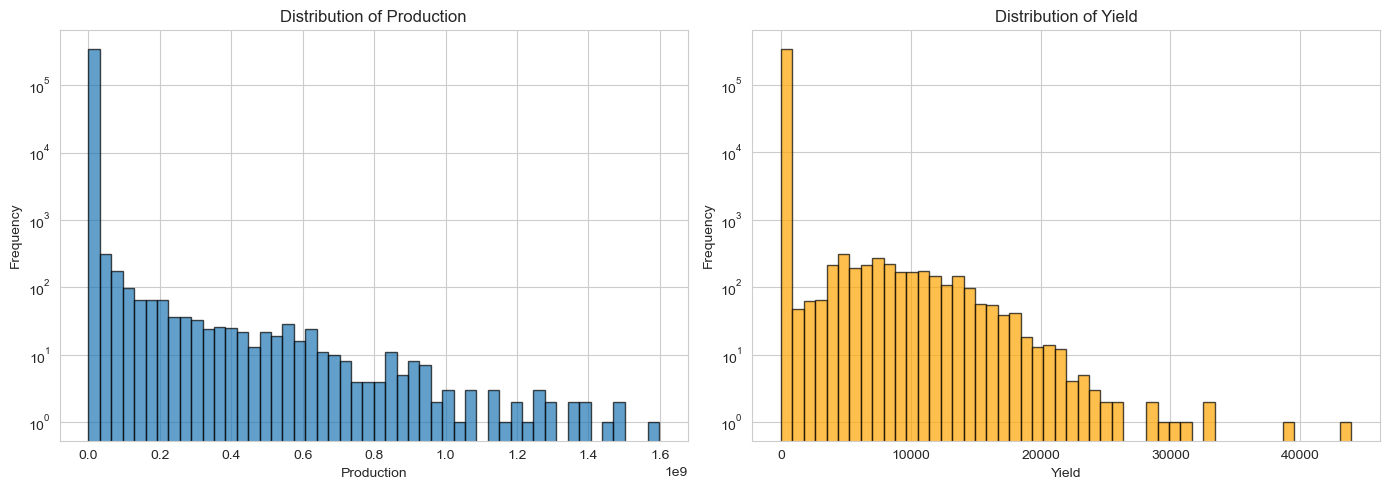

In [211]:
# 1. Distribution of Production
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(x['Production'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.title('Distribution of Production')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(x['Yield'].dropna(), bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.title('Distribution of Yield')
plt.yscale('log')

plt.tight_layout()
plt.show()

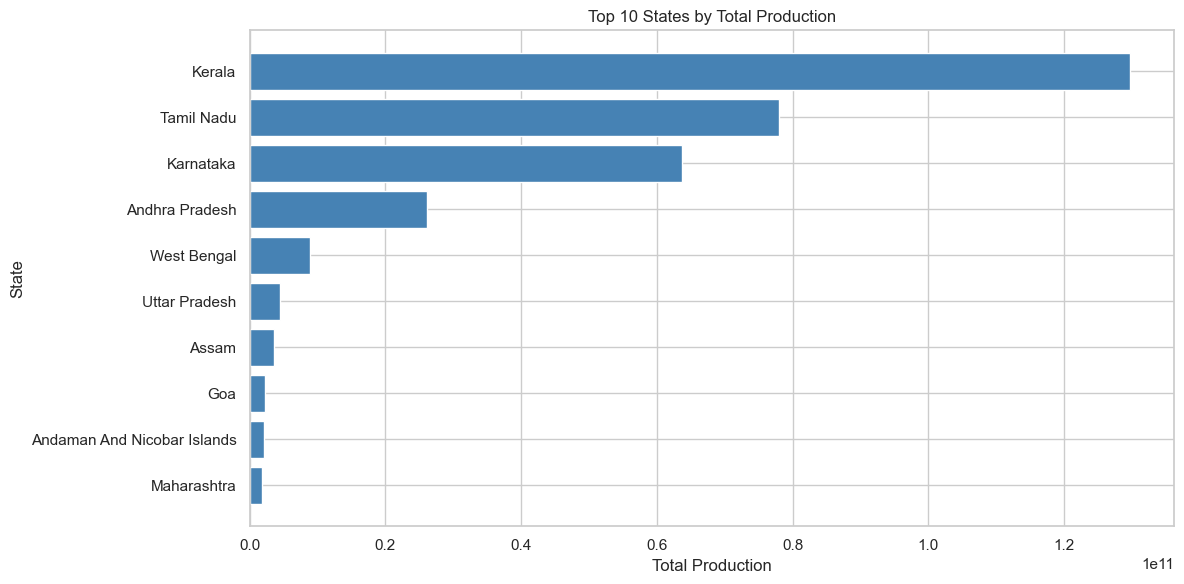

In [254]:
# 2. Top 10 States by Production
plt.figure(figsize=(12, 6))
top_states = x.groupby('State',observed=False)['Production'].sum().sort_values(ascending=False).head(10)
plt.barh(top_states.index, top_states.values, color='steelblue')
plt.xlabel('Total Production')
plt.ylabel('State')
plt.title('Top 10 States by Total Production')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

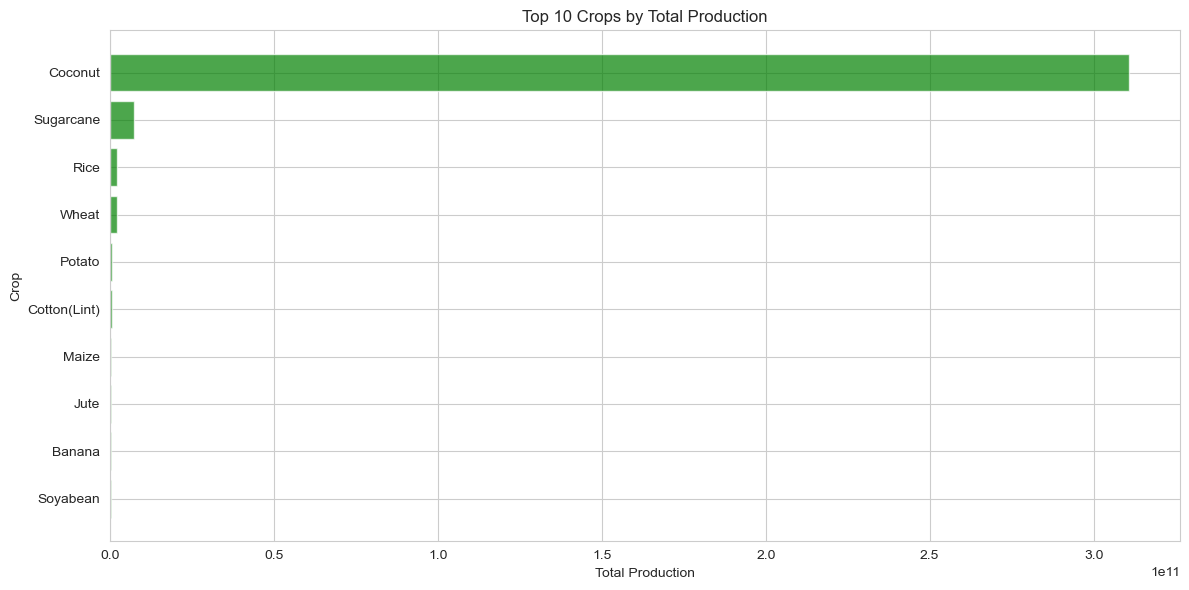

In [213]:
# 3. Top 10 Crops by Production
plt.figure(figsize=(12, 6))
top_crops = x.groupby('Crop',observed=False)['Production'].sum().sort_values(ascending=False).head(10)
plt.barh(top_crops.index, top_crops.values, color='green', alpha=0.7)
plt.xlabel('Total Production')
plt.ylabel('Crop')
plt.title('Top 10 Crops by Total Production')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

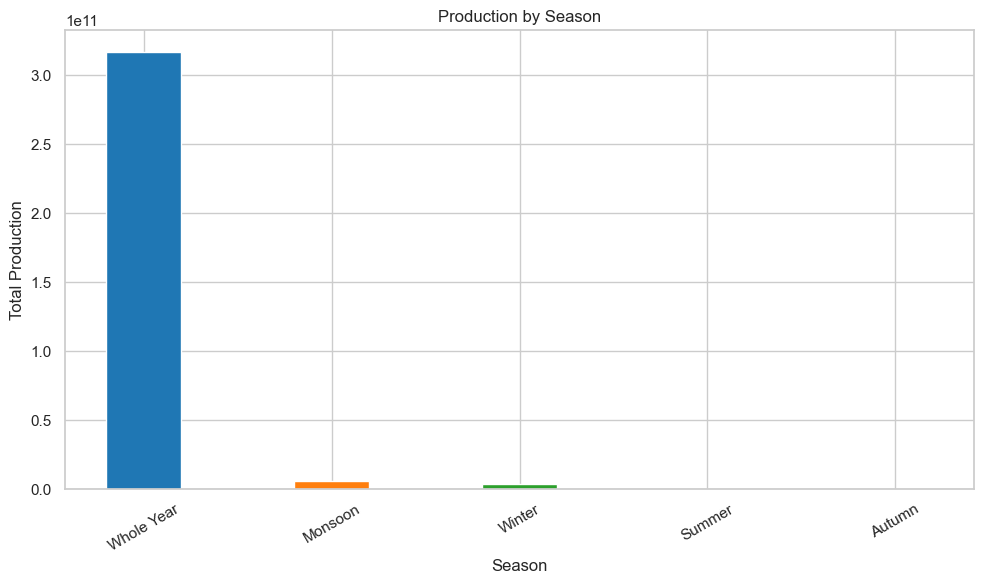

In [256]:
# 4. Season-wise Production Distribution
plt.figure(figsize=(10, 6))
season_prod = x.groupby('Season',observed=False)['Production'].sum().sort_values(ascending=False)
plt.bar(season_prod.index, season_prod.values,width=0.4, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.xlabel('Season')
plt.ylabel('Total Production')
plt.title('Production by Season')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

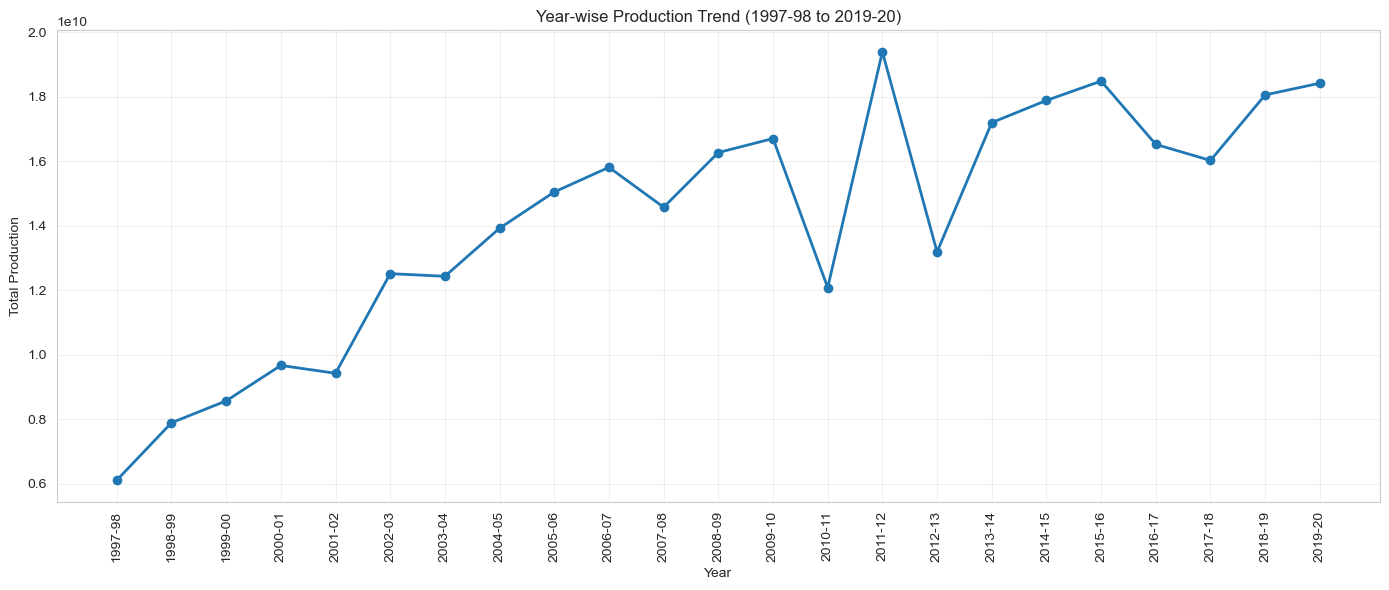

In [215]:
# 5. Year-wise Production Trend (excluding 2020-21 due to incomplete data)
plt.figure(figsize=(14, 6))
year_trend = x[x['Year'] != '2020-21'].groupby('Year')['Production'].sum().sort_index()
plt.plot(year_trend.index, year_trend.values, marker='o', linewidth=2, markersize=6)
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.title('Year-wise Production Trend (1997-98 to 2019-20)')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Phase 4: Key Insights and Findings

In [5]:
# Define insights as a structured dictionary
insights = {
    'header': 'KEY INSIGHTS FROM INDIA AGRICULTURE CROP PRODUCTION ANALYSIS',
    'overview': 'The dataset covers 345,407 records spanning 1997-98 to 2020-21 across 56 crops and 5 seasons, with no missing values or duplicates. Kerala leads in total production volume, while Puducherry achieves the highest yield at 779.96 units; Coconut dominates as the most productive crop, primarily during the Whole Year season.',
    'production_stats': 'Average production per record stands at 944,528 units (median: 717), contrasting with average yield of 79.40 units (median: 1.00), indicating variability driven by large-scale producers like Kerala. Whole Year, Monsoon, and Winter seasons account for the bulk of output.',
    'trends': 'Production exhibits an upward trajectory from 1997-98 to 2019-20 with yearly fluctuations; 2020-21 data remains incomplete at 319 records. Seasonal analysis reveals Whole Year as most dominant, followed by Kharif and Rabi.',
    'recommendations': 'Prioritize high-yield regions like Puducherry and Coconut cultivation while verifying 2020-21 data completeness. Leverage seasonal patterns for optimized crop planning across states.'
}

# Print formatted output
print('='*70)
print(insights['header'])
print('='*70)
print(f"\n{insights['overview']}")
print(f"\nProduction Statistics:")
print(f"{insights['production_stats']}")
print(f"\nTrends and Data Notes:")
print(f"{insights['trends']}")
print(f"\nActionable Recommendations:")
print(f"{insights['recommendations']}")
print(f"\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)

KEY INSIGHTS FROM INDIA AGRICULTURE CROP PRODUCTION ANALYSIS

The dataset covers 345,407 records spanning 1997-98 to 2020-21 across 56 crops and 5 seasons, with no missing values or duplicates. Kerala leads in total production volume, while Puducherry achieves the highest yield at 779.96 units; Coconut dominates as the most productive crop, primarily during the Whole Year season.

Production Statistics:
Average production per record stands at 944,528 units (median: 717), contrasting with average yield of 79.40 units (median: 1.00), indicating variability driven by large-scale producers like Kerala. Whole Year, Monsoon, and Winter seasons account for the bulk of output.

Trends and Data Notes:
Production exhibits an upward trajectory from 1997-98 to 2019-20 with yearly fluctuations; 2020-21 data remains incomplete at 319 records. Seasonal analysis reveals Whole Year as most dominant, followed by Kharif and Rabi.

Actionable Recommendations:
Prioritize high-yield regions like Puducherry 